# Support Vector Classifier

#### These results test our library against N-dimensional normal distributions centered at different vectors.
#### We compare it to the scikit-learn SVC library, both in terms of time and accuracy
#### We vary the number of samples, the dimension of the samples, the number of processes and subprocesses to invoke, the number of classes, and various tuning parameters internal to the SVC

In [1]:
import numpy as np
from svc2 import SVC
import time
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

### Function for generating M samples in N dimensions for C classes

In [2]:
def gen_ndim_norm(N, M, C):
    # map class label to its normal distb ctr.
    def loc_func(i):
        return i * 5
    
    partition = int(M / C) # each class will have this many samples
    mat = np.zeros((partition*C, N))
    for i in range(C):
        for j in range(partition):
            mat[(i*partition) + j, :] = np.random.normal(loc=loc_func(i), scale = 1, size=N)
    return mat

In [3]:
def gen_labels(M, C):
    # create a 1 dimensional ndarray like: [0,0,0,1,1,1] if M was 6 and c was 2
    partition = int(M / C)
    y = np.zeros(partition * C)
    for i in range(C):
        y[i*partition:i*partition+partition] = np.repeat(i, partition)
    return y

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


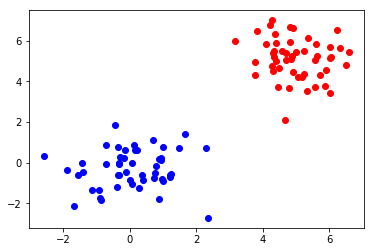

In [4]:
# Here's an example of 2 classes of totalling 100 samples in 2 dimensions
x = gen_ndim_norm(N = 2, M = 100, C = 2)
y = gen_labels(M = 100, C = 2)
print(y)
plt.plot(x[:50, 0], x[:50, 1], 'bo')
plt.plot(x[50:, 0], x[50:, 1], 'ro')

### Now we are going to generate many of these samples by varying some parameters. We train an SVC instance on each dataset and report the training time and accuracy for each. 

#### Here is a function to get the accuracy of the prediction

In [5]:
def accuracy(y, yhat):
    return round(sum(y==yhat) / y.shape[0], 3)

In [8]:
dimensions = [1, 5, 10, 20, 50, 100, 300, 1000]
samples = [100, 200, 500, 1000, 2000, 5000]
min_dims = [1, 5, 10, 20, 50]
min_samples = [100, 200, 500]
labels = 3

for d in min_dims:
    for s in min_samples:
        x = gen_ndim_norm(N = d, M = s, C = labels)
        y = gen_labels(s, labels)
        x, y = shuffle(x, y)
        clf = SVC()
        start = time.time()
        clf.fit(x, y)
        train_time = round(time.time() - start, 3)
        start = time.time()
        yhat = clf.predict(x)
        test_time = round(time.time() - start, 3)
        acc = accuracy(y, yhat)
        print("Samples: " + str(s) + "  Dims: " + str(d) + "  Accuracy: " + str(acc) + "  Train Time: " + str(train_time))

TypeError: 'NoneType' object is not subscriptable